<img src="https://rhyme.com/assets/img/logo-dark.png" align="center" width=150 height=37.5></img>
<h2 style="text-align:center;">Poker Hand Classification using Random Forests</h2>

Standard Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1: About the Data
***

![Alt text](https://farm4.staticflickr.com/3585/3299226824_4637597b74_z_d.jpg "Cards by bl0ndeeo2, Creative Commons License (https://flic.kr/p/62xpc7) ")

The [dataset](http://archive.ics.uci.edu/ml/datasets/Poker+Hand) we'll be exploring in this post is the Poker Hand data from the UCI Machine Learning Repository.

Each record in the dataset is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being:    

    0: Nothing in hand; not a recognized poker hand     
    1: One pair; one pair of equal ranks within five cards     
    2: Two pairs; two pairs of equal ranks within five cards     
    3: Three of a kind; three equal ranks within five cards     
    4: Straight; five cards, sequentially ranked with no gaps     
    5: Flush; five cards with the same suit     
    6: Full house; pair + different rank three of a kind     
    7: Four of a kind; four equal ranks within five cards     
    8: Straight flush; straight + flush     
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush     
    
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit).

In [2]:
poker_df=pd.read_csv('data/poker-hand-testing.data')

### Task 2: Separate the Data into Features and Targets
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [3]:
poker_df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [4]:
# Manually label the columns and classes based on the dataset description from the UCI Repository
poker_df.columns= ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels= ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']


# Separate the data into features (X) and targets (y)
X=poker_df.iloc[:,0:9]#select all rows, cols from 0 to 9
y=poker_df.hand

### Task 3: Evaluating Class Balance
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

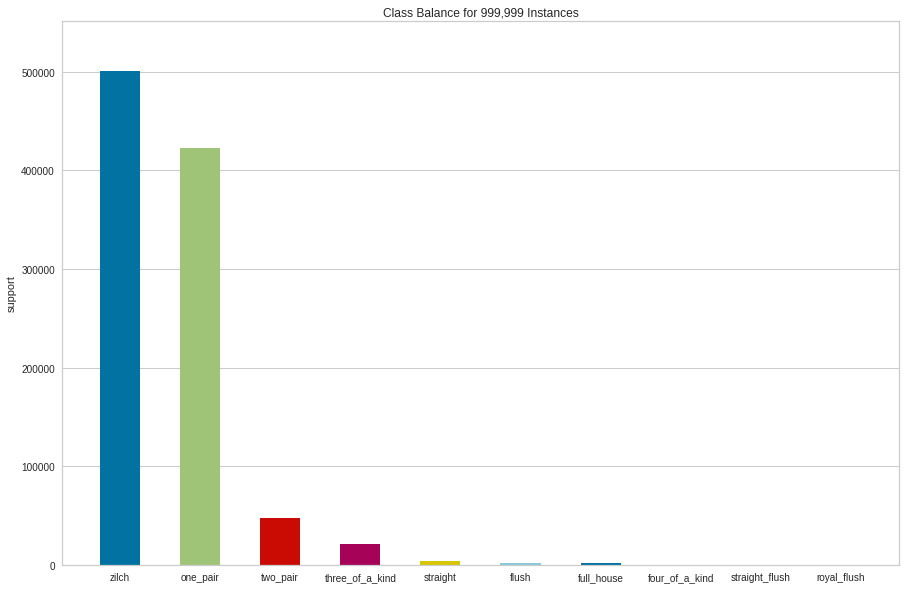

In [5]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

balance= ClassBalance(size=(1080, 720), labels=labels)

balance.fit(y)
balance.poof()



### Task 4: Upsampling from Minority Classes
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [6]:
poker_df.loc[poker_df['hand'] >= 5, 'hand']=5
y=poker_df.hand

labels= ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

### Task 5: Training the Random Forests Classifier
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#X-feature matrices, y-target vectors
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            n_jobs=-1)#-1 to use all cpu cores to parallelize jobs-- clf-model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Task 6: Classification Accuracy
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [8]:
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.6754533333333334


### Task 7: ROC Curve and AUC 
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

/home/rhyme/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


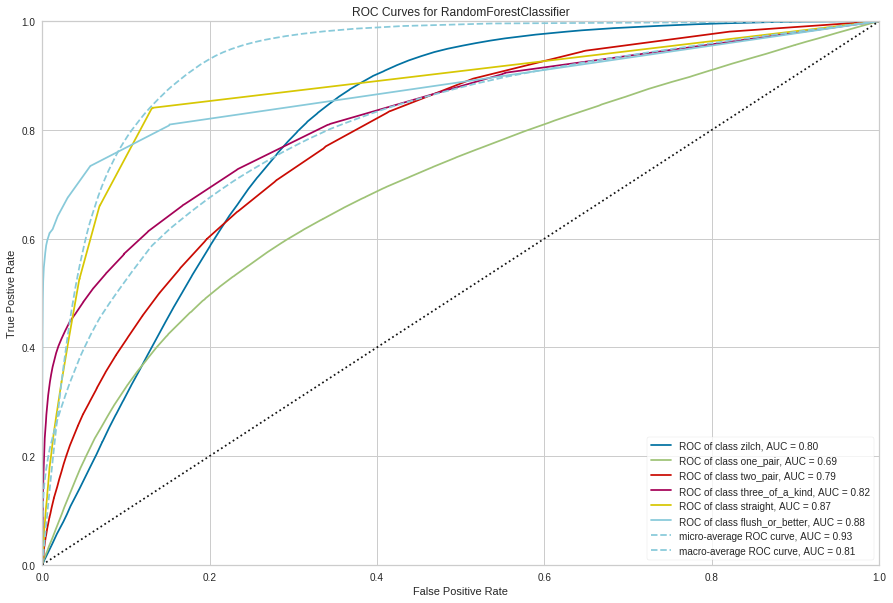

In [9]:
#receiver operating characteristic - ROC, AUC- Area under curve
from yellowbrick.classifier import ROCAUC
rocauc= ROCAUC(clf, size=(1080, 720), classes=labels)

rocauc.score(X_test, y_test)#y_test is optional as model will infer it
rocauc.poof();

 ### Task 8: Classification Report Heatmap
 ***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

/home/rhyme/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


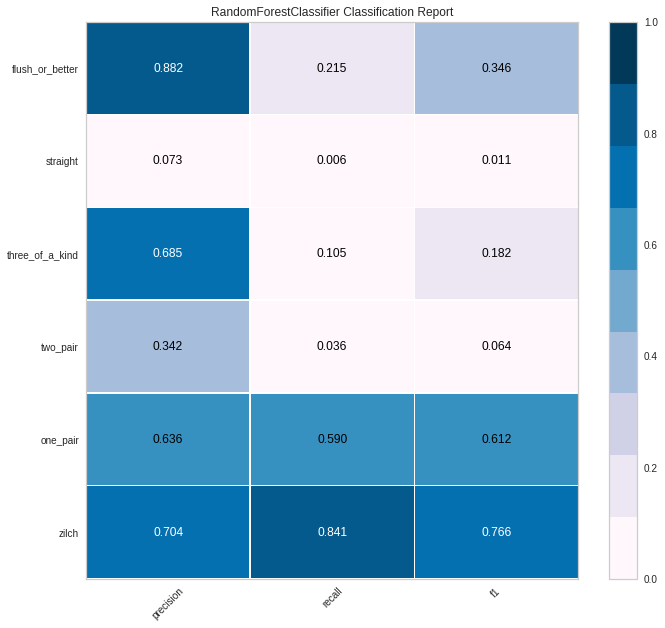

In [10]:
report = ClassificationReport(clf, size=(720,640), classes=labels, cmap='PuBu')
#clf-fitted model
report.score(X_test, y_test)
report.show()
#gives deeper intuition of the behaviour of the classifier over global accuracy as a metric 
#which can actually mask the functional weaknesses of one or more class of a multi-class problem

### Task 9: Class Prediction Error
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

/home/rhyme/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


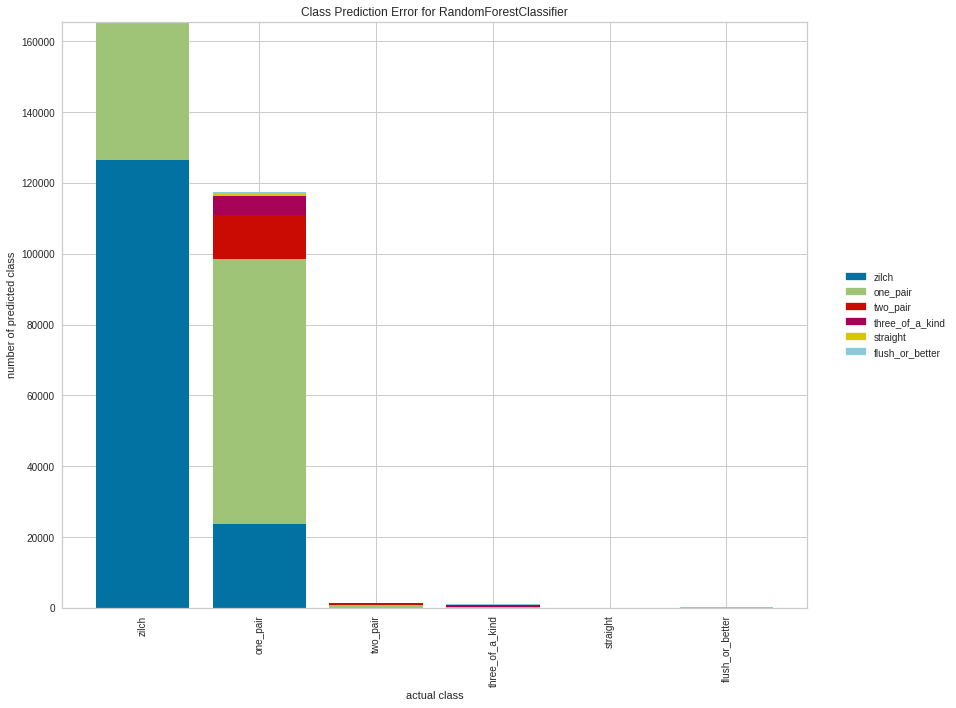

In [11]:
error= ClassPredictionError(clf, size=(1080,720), classes=labels)
error.score(X_test, y_test)
error.poof()